# Clase 17: Integrales compuestas y de Romberg

Incluso para funciones sencillas puede no ser posible obtener una respuesta analítica ("a mano") para sus integrales. Por eso son importantes los métodos de integración. Empezaremos por los más sencillos.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Integrales de polinomios interpolantes

Nuestro primer intento es usar los polinomios interpolantes de Lagrange para integrar.

$$
\int_a^b dx\,f(x) = \int_a^b dx\, \sum_{i=0}^n f(x_i) L_i(x) + \int_a^b dx\,\prod_{i=0}^n (x - x_i) \frac{f^{(n + 1)}(\xi)}{(n + 1)!}
$$

Interpolando toda la función con un polinomio lineal obtenemos la *regla del trapecio*

$$
\int_{x_o}^{x_1} dx\,f(x) = \frac{(x_1-x_o)}{2}[f(x_o) + f(x_1)] - \frac{h^3}{12}f''(\xi)
$$

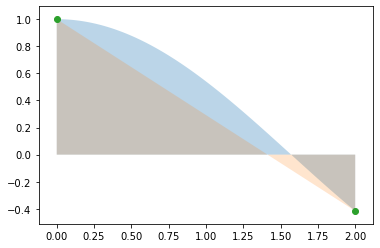

In [3]:
x = np.linspace(0,2,100)
plt.fill_between(x, np.cos(x), alpha=0.3)
plt.fill_between(x, np.cos(2)*x/2 - np.cos(0)*(x - 2)/2, alpha = 0.2)
plt.scatter([0,2], [np.cos(0), np.cos(2)])

In [4]:
def trapecio_uno(fxo, fx1, h):
    return (h/2)*(fxo + fx1) 

In [5]:
trapecio_uno(np.cos(0), np.cos(2), 2)

0.5838531634528576

In [6]:
np.sin(2)

0.9092974268256817

Interpolando la función con un polinomio cuadrático obtenemos la *regla de Simpson*

$$
\int_{x_o}^{x_2} dx\,f(x) = \frac{h}{3}(f(x_o) + 4f(x_1) + f(x_2)) - \frac{h^5}{90}f^{(4)}(\xi)
$$

(El término de error rigurosamente no se puede deducir a partir de los polinomios de Lagrange, ver libro)

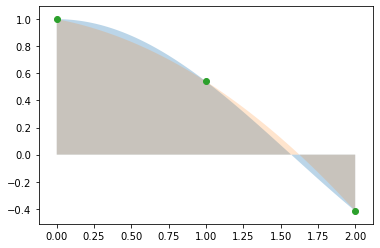

In [7]:
x = np.linspace(0,2,100)
plt.fill_between(x, np.cos(x), alpha=0.3)
plt.fill_between(x, np.cos(0)*(x - 2)*(x - 1)/(2*1) - \
                 np.cos(1)*x*(x-2)/(1*1) + np.cos(2)*x*(x-1)/(2*1), alpha = 0.2)
plt.scatter([0,1,2], [np.cos(0), np.cos(1), np.cos(2)])

In [8]:
def simpson_uno(fxo, fx1, fx2, h):
    return (h/3)*(fxo + 4*fx1 + fx2)

In [9]:
simpson_uno(np.cos(0), np.cos(1), np.cos(2), 1)

0.9150207956418055

Estos son casos especiales de la llamada fórmula de Newton-Cotes cerrada, que se apoya en el siguiente teorema (que no demostraremos):

**Teorema**: Sea $f \in C^{n+2}[a,b]$, entonces existe un $\xi \in (a,b)$ tal que

$$
\int_{a}^b dx\,f(x) = \sum_{i = 0}^n a_i f(x_i) + \frac{h^{n+3}f^{(n+2)}(\xi)}{(n + 2)!}\int_0^n dt\,t^2(t-1)...(t-n)
$$

donde $n$ es par, $a_i = \int_a^b dx\, L_{n,i}(x)$ y $x_o = a$, $x_n = b$. Análogamente si $n$ es impar y $f \in C^{n+1}[a,b]$, entonces

$$
\int_{a}^b dx\,f(x) = \sum_{i = 0}^n a_i f(x_i) + \frac{h^{n+2}f^{(n+1)}(\xi)}{(n + 2)!}\int_0^n dt\,t^2(t-1)...(t-n)
$$

Pero no necesariamente tenemos que escoger $x_o = a$ y $x_n = b$. Podemos tomar puntos que estén entre $a$ y $b$ pero sin usar los extremos para obtener los polinomios interpolantes. En este caso se usa la fórmula de Newton-Cotes abierta:

**Teorema**: Sea $f \in C^{n+2}[a,b]$, entonces existe un $\xi \in (a,b)$ tal que

$$
\int_{a}^b dx\,f(x) = \sum_{i = 0}^n a_i f(x_i) + \frac{h^{n+3}f^{(n+2)}(\xi)}{(n + 2)!}\int_{-1}^{n+1} dt\,t^2(t-1)...(t-n)
$$

donde $n$ es par, $a_i = \int_a^b L_{n,i}(x)$ y $a = x_o - h$, $b = x_n + h$. Análogamente si $n$ es impar y $f \in C^{n+1}[a,b]$, entonces

$$
\int_{a}^b dx\,f(x) = \sum_{i = 0}^n a_i f(x_i) + \frac{h^{n+2}f^{(n+1)}(\xi)}{(n + 2)!}\int_{-1}^{n+1} dt\,t^2(t-1)...(t-n)
$$

Un caso especial es la llamada *regla del punto medio* con $n = 0$ (con $h = (b - a)$):

$$
\int_a^b dx\,f(x) = hf((b-a)/2) + \frac{h^3}{24}f''(\xi)
$$

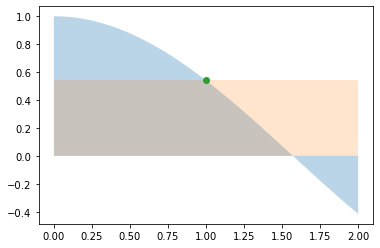

In [10]:
x = np.linspace(0,2,100)
plt.fill_between(x, np.cos(x), alpha=0.3)
plt.fill_between(x, np.cos(1), alpha = 0.2)
plt.scatter([1], [np.cos(1)])

In [11]:
def punto_medio_uno(fxo, h):
    return 2*h*fxo

In [12]:
punto_medio_uno(np.cos(1), 1)

1.0806046117362795

## Integrales compuestas

Para aproximar funciones más complicadas necesitaríamos polinomios de alto orden, pero ya sabemos que éstos pueden introducir oscilaciones indeseadas. Por eso podemos en cambio dividir el intervalo de integración en muchos intervalos pequeños de ancho $h$ y obtener mejores aproximaciones a las integrales (como hubiera hecho Arquímedes).

**Fórmula compuesta del punto medio:**

$$
\int_a^b dx\,f(x) = h\sum_{i = 0}^n f((x_{i +1} - x_i)/2) + \frac{h^3}{24}\sum_{i=0}^n f''(\xi_i)
$$

Pero hay un teorema (llamado del valor intermedio) que nos dice que si $f''(x)$ es continua, existe $\mu \in [\xi_o,\xi_n]$ tal que

$$
\frac{1}{n}\sum_{i=0}^n f''(\xi_i) = f''(\mu)
$$

y dado que $nh = (b-a)$ tenemos que

$$
\int_a^b dx\,f(x) = h\sum_{i = 0}^n f((x_{i +1} - x_i)/2) + \frac{h^2 (b - a)}{24} f''(\mu)
$$

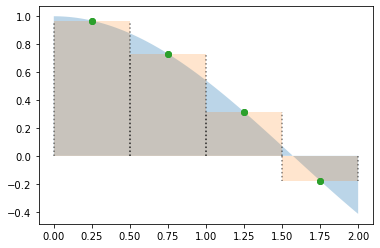

In [13]:
x = np.linspace(0,2,100)
plt.fill_between(x, np.cos(x), alpha = 0.3)
xi = np.array([0,1/2,1/2,1,1,3/2,3/2,2])
xp = np.array([1/4,1/4,3/4,3/4,5/4,5/4,7/4,7/4])
plt.fill_between(xi, np.cos(xp), alpha = 0.2)
plt.scatter(xp, np.cos(xp))
for i in range(len(xi)):
    plt.plot([xi[i],xi[i]], [0,np.cos(xp[i])], color='black', alpha = 0.5, linestyle = ':')

In [14]:
def punto_medio(f, a, b, n):
    h = (b-a)/n
    fx = f(np.linspace(a + h/2, b - h/2, n, endpoint=True))
    return h*sum(fx)

In [15]:
punto_medio(np.cos, 0, 2, 4)

0.9188387986651211

**Fórmula compuesta del trapecio:**

$$
\int_a^b dx\,f(x) = \frac{h}{2}\sum_{i=0}^{n-1}[f(x_{i+1}) + f(x_i)] - \frac{h^2 (b-a)}{12}f''(\mu)
$$

Pero podemos reorganizar la suma

$$
\int_a^b dx\,f(x) = \frac{h}{2}\left[\sum_{i=1}^{n} f(x_i) + \sum_{i=0}^{n-1} f(x_i)\right]- \frac{h^2 (b-a)}{12}f''(\mu)
$$

y esto es igual a

$$
\int_a^b dx\,f(x) = \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1} f(x_i) + f(b)\right]- \frac{h^2 (b-a)}{12}f''(\mu)
$$

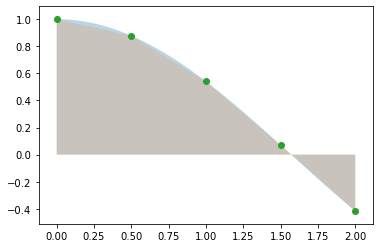

In [16]:
x = np.linspace(0,2,100)
plt.fill_between(x, np.cos(x), alpha = 0.3)

h = 2/4
def poly(x):
    ind = int(x/h)
    return -np.cos(h*ind)*(x - h*(ind+1))/h + np.cos(h*(ind+1))*(x - h*ind)/h
plt.fill_between(x, [poly(xi) for xi in x], alpha = 0.2)

xp = np.arange(5)*h
plt.scatter(xp, np.cos(xp))

In [17]:
def trapecio(f, a, b, n):
    h = (b - a)/n
    fx = f(np.linspace(a+h, b-h, n-1, endpoint=True))
    return (h/2)*(f(a) + 2*sum(fx) + f(b))

In [18]:
trapecio(np.cos, 0, 2, 4)

0.890274325576322

**Fórmula compuesta de Simpson**: Se deduce de manera análoga


$$
\int_a^b dx\,f(x) = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + 4\sum_{i=1}^{n/2} f(x_{2i-1}) + f(b)\right]- \frac{h^4 (b-a)}{180}f''(\mu)
$$

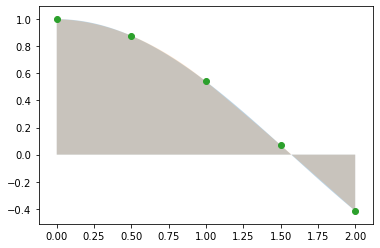

In [19]:
x = np.linspace(0,2,100)
plt.fill_between(x, np.cos(x), alpha = 0.3)

h = 2/4
def poly(x):
    ind = int(x/(2*h))
    Lo = (x - h*(2*ind+1))*(x - h*(2*ind+2))/(2*h*h)
    L1 = -(x - h*(2*ind))*(x - h*(2*ind+2))/(h*h)
    L2 = (x - h*(2*ind))*(x - h*(2*ind+1))/(2*h*h)
    return np.cos(2*h*ind)*Lo + np.cos(h*(2*ind+1))*L1 + np.cos(h*(2*ind+2))*L2
plt.fill_between(x, [poly(xi) for xi in x], alpha = 0.2)

xp = np.arange(5)*h
plt.scatter(xp, np.cos(xp))

A pesar de que la potencia de $h$ de los métodos compuestos es menor (mayor error), en realidad no son comparables ya que $h$ es mucho menor en los métodos compuestos.

### Estabilidad de los métodos por polinomios interpolantes

El error de redondeo o intrínseco de estos métodos *no cambia al cambiar $h$*. Esto quiere decir que el método es estable, pero cuando el error del método es lo comparable con el error intrínseco no se gana nada con reducir $h$ ulteriormente. 

Deduscamos este hecho para la regla de Simpson. Si $f(x_i) = \tilde{f}(x_i) + e_i$ y si además $e_i \leq \epsilon$ tenemos

$$
e(h) = \left|\frac{h}{3}\left[e_o + 2\sum_{i=1}^{n/2-1} e_{2i} + 4\sum_{i=1}^{n/2} e_{2i-1} + e_n\right]\right| \leq \frac{h}{3}\left|\epsilon + 2\left(\frac{n}{2} - 1\right)\epsilon + 4\frac{n}{2}\epsilon + \epsilon\right| = \frac{h}{3}3n\epsilon = (b - a)\epsilon
$$

## Integración de Romberg

Resulta que el error de la regla del trapecio es del tipo

$$
\int_a^b dx\,f(x) = \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1} f(x_i) + f(b)\right] + K_2 h^2 + K_4 h^4 + K_6 h^6 + ...
$$

y entonces podemos aplicar la extrapolación de Richardson para reducir el error. Esto se conoce como el método de integración de Romberg.

La estrategia es ir calculando fila por fila en la tabla

| $\mathcal{O}(h^2)$ | $\mathcal{O}(h^4)$ | $\mathcal{O}(h^6)$ | $\mathcal{O}(h^8)$ |
|-|-|-|-|
| $R_{0,0}$ | | | |
| $R_{0,1}$ | $R_{1,1}$ | | |
| $R_{0,2}$ | $R_{1,2}$ | $R_{2,2}$ | |
| $R_{0,3}$ | $R_{1,3}$ | $R_{2,3}$ | $R_{3,3}$ |

In [20]:
def romberg(f, a, b, n):
    
    R0 = np.zeros(n)
    R1 = np.zeros(n)
    
    h = (b - a)
    R0[0] = (h/2)*(f(b) + f(a))
    for i in range(1, n):
        s = sum(f(a + (k - 0.5)*h) for k in range(1, int(2**(i-1)) + 1))
        R1[0] = (1/2)*(R0[0] + h*s) # aproximación trapezoidal papra este h
        for j in range(1, i+1):
            R1[j] = R1[j-1] + (R1[j-1] - R0[j-1])/(4**(j) - 1)
        h = h/2
        for j in range(i+1):
            R0[j] = R1[j]
            
    return R0[-1]

In [21]:
romberg(np.cos, 0, 1, 20)

0.8414709848078946

In [22]:
np.sin(1)

0.8414709848078965

## Tareas

### Tarea 9.1

Ejercicio 4.4.22 del libro de Burden de análisis numérico.

La ecuación

$$
\int_0^x dt\,\frac{1}{\sqrt{2\pi}}e^{-t^2/2} = 0.45\,,
$$

se puede resolver para $x$ usando el método de Newton. Para lograrlo es necesario evaluar la función

$$
f(p) = \int_0^p dt\,\frac{1}{\sqrt{2\pi}}e^{-t^2/2} - 0.45\,.
$$

Use el método compuesto del trapecio para evaluar esta función y luego use el método de Newton para encontrar $x$ con una precisión de $10^{-5}$.

### Tarea 9.2

Use el método compuesto de Simpson y el método compuesto del trapecio para encontrar la siguiente integral

$$
\int_0^4 \frac{dx}{\sqrt{x^2 + 16}}
$$

Compare con el resultado exacto para obtener el error cometido. Grafique el error en función de $h$ para ambos métodos y compare con las fórmulas de error.

### Tarea 9.3

Ejercicio 4.4.17 libro de Burden de análisis numérico.

Determine con una precisión de $10^{-6}$ la longitud del gráfico de la elipse con ecuación $4x^2 + 9y^2 = 36$. Para esto use algún método de integración compuesta.

### Tarea 9.4

Suponga que la medición de un cierto proceso físico da como resultado la siguiente expresión

$$
p(x) = \sin x + n(x)
$$

donde $n$ es el error experimental que podemos describir como un número aleatorio, para cada valor de $x$, tomado de una distribución gaussiana con media $0$ y desviación estándar $10^{-5}$. Queremos calcular la integral

$$
\int_0^1 dx\,p(x)\,.
$$

Use el método compuesto de Simpson para calcular esta integral. El verdadero valor de esta integral es $1-\cos(1)$. Grafique el error cometido en función de $h$. ¿Se puede lograr una precisión de $10^{-7}$? ¿Por qué?

### Tarea 9.5

En clase escribimos un código para el método de Romberg en el cual el usuario debe ingresar el número de filas a calcular. Modifique el código para que el usuario especifique una precisión y el método se detenga cuando sea alcanzada esa precisión. 

Para estimar el error cometido en el cálculo de una integral se puede comparar el resultado obtenido en una fila dada, con el resultado obtenido en la fila anterior.